In [ ]:
import numpy as np

### Generate Data
Create a function that randomly gives either +1 or -1 as input

In [ ]:
def create_u():
  """
  Inputs:
    None
  Outputs:
    u: +1 or -1 randomly generated
  """
  # YOUR CODE HERE
  data = [1, -1]
  np.random.shuffle(data)
  u = data[0]
  return u

#### Desired data
$y(t+1) = ay(t) + by(t-1) + cu(t) $

In [ ]:
"""Test for create_u"""
u = create_u()
assert u==1 or u== -1


In [ ]:
def generate_data(timesteps, a, b, c):
  """
  Inputs:
    timesteps: int, number of timesteps of data
  Outputs:
    u: numpy array with each element +1 or -1 of shape (timesteps, )
    yd: numpy array with each element computed using above equation of shape (timesteps, )
  """
  # YOUR CODE HERE
  u = np.array([create_u() for i in range(timesteps)])
  yd = np.zeros((timesteps,), dtype=float)
  for i in range(2, timesteps):
    yd[i] = a*yd[i-1] + b*yd[i-2] + c*u[i-1]
  return u, yd


In [ ]:
### Generate u, yd
u, yd = generate_data(10000, 1.1, -0.3, 0.5)

### Define the model that we are going to train
$y(t+1) = w_0y(t) + w_1y(t-1) + w_2u(t)$

In [ ]:
def get_y_tplus1(w, yt, ytminus1, u):
  """
  Inputs:
    w: numpy array of weights of shape (3, )
    yt: float, y value at time t
    ytminus1: float, y value at time t - 1
    u: input at time t
  Outputs:
    y_tplus1: float, y at t+1
  """
  # YOUR CODE HERE
  y_tplus1 = w[0]*yt + w[1]*ytminus1 + u
  return y_tplus1

### Forward propagation of gradients
We propagate the gradients forwards using the following recurrence relations
$$
\frac{\partial y(t+1)}{\partial w_0} = w_0\frac{\partial y(t)}{\partial w_0} + y(t) + w_1\frac{\partial y(t-1)}{\partial w_0}
$$
<br><br>
$$
\frac{\partial y(t+1)}{\partial w_1} = w_0\frac{\partial y(t)}{\partial w_1} + y(t-1) + w_1\frac{\partial y(t-1)}{\partial w_1} \\
$$
<br><br>
$$
\frac{\partial y(t+1)}{\partial w_2} = w_0\frac{\partial y(t)}{\partial w_2} +  w_1\frac{\partial y(t-1)}{\partial w_2} + u(t) 
$$
<br><br>
pwj1 is a matrix $\frac{\partial y(t)}{\partial w} =
[\frac{\partial y(t)}{\partial w_0}, \frac{\partial y(t)}{\partial w_1}, \frac{\partial y(t)}{\partial w_2}]$
<br><br>
pwj0 is a matrix $\frac{\partial y(t-1)}{\partial w} =
[\frac{\partial y(t-1)}{\partial w_0}, \frac{\partial y(t-1)}{\partial w_1}, \frac{\partial y(t-1)}{\partial w_2}]$
<br><br>
pwj2 is a matrix $\frac{\partial y(t+1)}{\partial w} =
[\frac{\partial y(t+1)}{\partial w_0}, \frac{\partial y(t+1)}{\partial w_1}, \frac{\partial y(t+1)}{\partial w_2}]$

In [ ]:
def forward_prop_gradients(w, yt, ytminus1, u, pwj1, pwj0):
  """
  Inputs:
    w: numpy array of weights [w0, w1, w2]
    yt: float, y value at time t
    ytminus1: float, y value at time t - 1
    u: input at time t
    pwj1: numpy array of shape (3, ) as described above
    pwj0: numpy array of shape (3, ) as described above
  Outputs:
    pwj2: numpy array of shape (3, ) as described above
  """  
  # YOUR CODE HERE
  term1 = w[0]*pwj1[0] + w[1]*pwj0[0] + yt
  term2 = w[0]*pwj1[1] + w[1]*pwj0[1] + ytminus1
  term3 = w[0]*pwj1[2] + w[1]*pwj0[2] + u
  pwj2 = np.array([term1, term2, term3])
  return pwj2

### Weight update - Gradient descent
$E = \frac{1}{2}(y_d - y)^2$ <br>
$w_{new} = w_{old} - \eta\frac{\partial E}{\partial w} = w_{old} - \eta(y_d - y)\cdot pwj_2$ 

In [ ]:
def update_w(w, eta, yd, y, pwj2):
  """
  Inputs:
    w: numpy array of weights [w0, w1, w2]
    eta: float, learning rate
    yd: scalar(float), desired value of y at time t+1
    y: scalar(float), predicted value of y at time t+1
    pwj2: numpy array of shape(3,) obtained from forward_prop_weights
  Outputs:
    w_updated: numpy array of shape(3, ), updated weights
  """
  # YOUR CODE HERE
  w_updated = w - eta*(yd-y)*pwj2
  return w_updated

### Cost function (error)
$E = \frac{1}{2}(y_d - y)^2$ <br>


In [ ]:
def err(yd, y):
  """
  Inputs:
    yd: scalar(float), desired value of y at time t+1
    y: scalar(float), predicted value of y at time t+1
  Outputs:
    E: scalar(float), error as described above 
  """
  # YOUR CODE HERE
  E = 0.5*((yd-y)**2)
  return E

### Apply RTRL

In [ ]:
def RTRL(yd, u, eta, timesteps):
  """
  Inputs:
    yd: numpy array of shape(timesteps,) 
    u: Inputs used to generate yd
    eta: scalar(float), learning rate
    timesteps: int, number of timesteps
  Outputs:
    west: numpy array of shape(timesteps,3), keeps track of all the updated weights over time
    error: numpy array of shape(timesteps,), keeps track of error (as obtained from function err()) over time
  """
  # YOUR CODE HERE
  west = []
  error = []

  y_pred = np.zeros((timesteps,), dtype=float)
  error = np.zeros((timesteps,), dtype=float)
  west = np.zeros((timesteps, 3), dtype=float)

  #t=0
  w = (2 * np.random.random((3,)) - 1) * 0.01/2
  pwj0 = np.zeros((3,))
  pwj1 = np.zeros((3,))
  west[0] = w
  error[0] = err(yd[0], y_pred[0])

  #t=1

  ##weight updation
  pwj2 = forward_prop_gradients(w, yd[0], 0, u[0], pwj1, pwj0)
  pwj0 = pwj1
  pwj1=pwj2

  w = update_w(w, eta, yd[1], y_pred[1], pwj2)
  west[1] = w

  ##prediction
  y_pred[1] = get_y_tplus1(w, yd[0], 0, u[0])
  error[1] = err(yd[1], y_pred[1])

  for i in range(2, timesteps):
    #weight updation
    pwj2 = forward_prop_gradients(w, yd[i-1], yd[i-2], u[i-1],pwj1,pwj0)
    pwj0 = pwj1
    pwj1 = pwj2

    w = update_w(w, eta, yd[i], y_pred[i], pwj2)
    west[i] = w

    #prediction
    y_pred[i] = get_y_tplus1(w,yd[i-1], yd[i-2], u[i-1])
    E = err(yd[i],y_pred[i])
    error[i] = E

  print(y_pred[:5:-1])
  print(yd[:5:-1])
  return west, error
   

In [ ]:
def plot_w(west):
  plt.plot(west[:,0])
  plt.show()
  plt.plot(west[:,1])
  plt.show()
  plt.plot(west[:,2])
  plt.show()

In [ ]:
def plot_err(error):
  plt.plot(error)
  plt.show()

[ 5.64314607e-01  1.62048267e+00  2.67974917e+00  3.06519935e+00
  7.58360012e-01  6.17657124e-01  1.14753949e+00  3.66993208e+00
  1.49799395e+00  1.23674625e+00  9.23224152e-01  5.53932580e-01
  1.26827780e-01 -3.44143931e-01 -7.58389367e-01 -8.06877956e-01
  1.06620609e+00 -1.56163116e+00 -1.84323361e+00 -4.86697259e-02
 -2.18681385e+00  2.72584547e-01  8.26513119e-01  1.36527303e+00
  1.56567882e+00 -2.98279212e-01  1.83010640e+00 -4.31026619e-01
 -3.37581918e-01  1.69050306e+00 -8.08339648e-01 -1.29285165e+00
 -1.43580570e+00  5.21816459e-01 -1.43761503e+00  1.11932173e+00
  1.63402246e+00  1.68083487e+00 -7.58942261e-01 -1.12614452e+00
 -1.03517490e+00  1.41105530e+00  1.40843680e+00 -9.90673420e-01
 -1.10308005e+00  6.93366832e-01 -1.88088125e+00 -1.99196223e+00
  4.15417178e-01  9.01859848e-01  1.37162648e+00  1.54278309e+00
 -3.36366941e-01  1.69829485e+00 -7.08774710e-01 -1.11440210e+00
 -1.28204441e+00  4.19130077e-01 -2.25274867e+00 -2.56565933e+00
 -4.35186910e-01 -2.20780

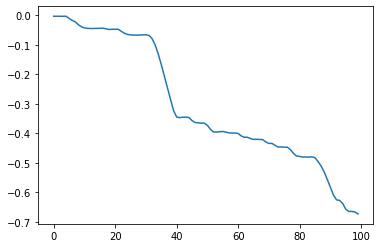

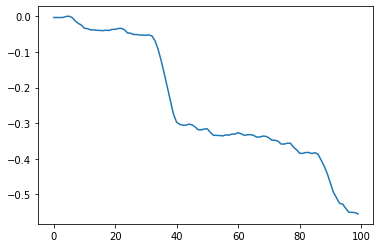

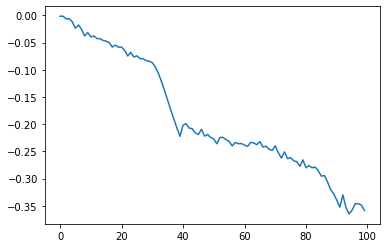

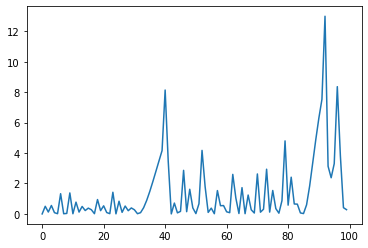

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

eta = 0.01
iterations = 100

west, error = RTRL(yd, u, eta, iterations)

plot_w(west)
# print(west[-1])
plot_err(error)
# print(error[-1])